<a href="https://colab.research.google.com/github/Sweata1501/COVID-19/blob/master/Regression_pycaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     |████████████████████████████████| 256kB 2.8MB/s 
     |████████████████████████████████| 66.2MB 69kB/s 
     |████████████████████████████████| 148.9MB 72kB/s 
     |████████████████████████████████| 266kB 48.2MB/s 
     |████████████████████████████████| 102kB 11.8MB/s 
     |████████████████████████████████| 276kB 42.2MB/s 
     |████████████████████████████████| 1.8MB 43.3MB/s 
     |████████████████████████████████| 6.8MB 43.8MB/s 
     |████████████████████████████████| 174kB 49.8MB/s 
     |████████████████████████████████| 1.6MB 46.3MB/s 
     |████████████████████████████████| 13.9MB 43.0MB/s 
     |████████████████████████████████| 604kB 27.3MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 3.1MB 45.9MB/s 
     |████████████████████████████████| 71kB 9.4MB/s 
     |████████████████████████████████| 71kB 8.9MB/s 
     |████████████████████████████████| 2.1MB 38.8MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
 

Regression

In [ ]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [ ]:
from pycaret.datasets import get_data
data=get_data('diamond')

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [ ]:
data.shape

(6000, 8)

In [ ]:
train=data.sample(frac=0.75,random_state=1234)
test=data.drop(train.index)

In [ ]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

In [ ]:
train.shape
test.shape

(1500, 8)

In [ ]:
from pycaret.regression import *
reg=setup(data=train,target='Price')

,Description,Value
0,session_id,6071
1,Target,Price
2,Original Data,"(4500, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3149, 28)"


In [ ]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,6.093945e+02,1.993116e+06,1.373856e+03,0.9804,0.0650,0.0478,1.107
xgboost,Extreme Gradient Boosting,6.822661e+02,2.109041e+06,1.429800e+03,0.9791,0.0718,0.0537,0.778
et,Extra Trees Regressor,7.516018e+02,2.657761e+06,1.587547e+03,0.9736,0.0797,0.0596,1.065
rf,Random Forest Regressor,7.762770e+02,3.464428e+06,1.794966e+03,0.9661,0.0826,0.0597,1.010
gbr,Gradient Boosting Regressor,8.965147e+02,3.565200e+06,1.851416e+03,0.9651,0.1007,0.0760,0.201
lightgbm,Light Gradient Boosting Machine,7.667008e+02,3.852488e+06,1.873823e+03,0.9623,0.0786,0.0568,0.067
dt,Decision Tree Regressor,9.846228e+02,5.196224e+06,2.194659e+03,0.9488,0.1065,0.0767,0.025
lr,Linear Regression,2.324085e+03,1.367441e+07,3.667609e+03,0.8632,0.6534,0.2743,0.277
lasso,Lasso Regression,2.323689e+03,1.366951e+07,3.667771e+03,0.8632,0.6312,0.2743,0.026
llar,Lasso Least Angle Regression,2.274582e+03,1.370132e+07,3.670464e+03,0.8631,0.6445,0.2620,0.018


In [ ]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
cb=create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,666.9779,2.369681e+06,1539.3769,0.9773,0.0675,0.0495
1,667.2835,3.511016e+06,1873.7704,0.9681,0.0668,0.0487
2,578.6606,1.107995e+06,1052.6135,0.9890,0.0625,0.0474
3,593.5535,1.463983e+06,1209.9516,0.9842,0.0693,0.0500
4,608.6398,3.136378e+06,1770.9823,0.9680,0.0657,0.0477
5,587.5263,1.132234e+06,1064.0647,0.9879,0.0662,0.0478
6,653.7041,1.803371e+06,1342.8963,0.9839,0.0648,0.0486
7,509.4852,8.100825e+05,900.0458,0.9874,0.0626,0.0476
8,610.0798,3.092783e+06,1758.6311,0.9713,0.0639,0.0442
9,618.0341,1.503638e+06,1226.2290,0.9865,0.0607,0.0460


In [ ]:
cb_tuned=tune_model(cb)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1128.7568,5.720688e+06,2391.7960,0.9452,0.1383,0.1081
1,1002.2405,7.442520e+06,2728.0982,0.9325,0.1275,0.0911
2,943.9077,3.144471e+06,1773.2657,0.9686,0.1274,0.0964
3,865.8073,2.381707e+06,1543.2782,0.9743,0.1203,0.0903
4,991.7948,7.781642e+06,2789.5594,0.9207,0.1211,0.0932
5,923.6056,3.001971e+06,1732.6196,0.9680,0.1110,0.0860
6,1001.4127,3.889807e+06,1972.2593,0.9653,0.1208,0.0893
7,752.1007,1.209739e+06,1099.8814,0.9812,0.1158,0.0874
8,980.5861,6.752335e+06,2598.5256,0.9373,0.1229,0.0903
9,832.6051,1.888678e+06,1374.2917,0.9831,0.0984,0.0742


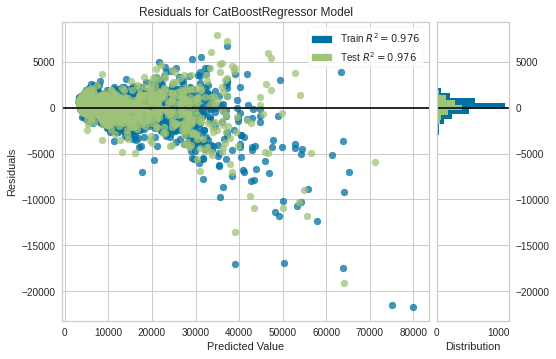

In [ ]:
plot_model(cb_tuned)

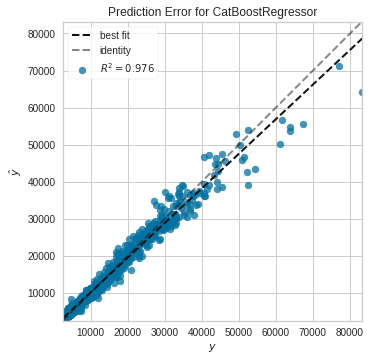

In [ ]:
plot_model(cb_tuned,plot='error')

In [ ]:
cb_tuned.feature_importances_

array([5.79139376e+01, 0.00000000e+00, 0.00000000e+00, 4.59237920e-02,
       1.79998422e-01, 7.73065537e-03, 5.99645515e+00, 5.90817622e-01,
       6.45457380e-01, 8.95661551e-01, 4.69528963e+00, 8.34388789e+00,
       3.29847973e-01, 1.72454816e+00, 1.14379008e+01, 1.51733495e+00,
       4.76705931e+00, 6.45435127e-01, 1.79239673e-01, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.26428997e-02, 3.08313719e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

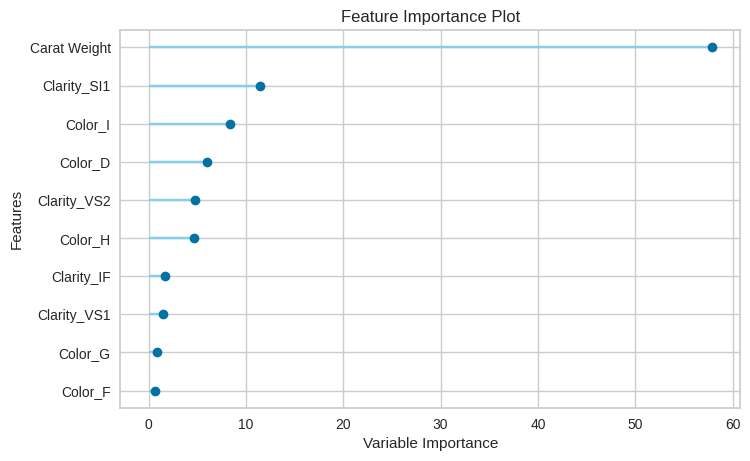

In [ ]:
plot_model(cb_tuned,plot='feature')

In [ ]:
predict_model(cb_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,905.9352,2.601254e+06,1612.8402,0.9757,0.1113,0.0848


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,0.97,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3498.0,4367.605114
1,0.86,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3997.0,3924.062431
2,1.11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5535.0,5621.578662
3,1.01,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6912.0,7477.418623
4,0.90,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4147.0,4301.255181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1.22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6713.0,6656.958525
1347,2.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,17160.0,20352.175278
1348,2.33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,24894.0,24185.746412
1349,1.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9710.0,9643.580990


In [ ]:
final_model=finalize_model(cb_tuned)

In [ ]:
predict_model(final_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,781.561,1.716857e+06,1310.289,0.984,0.0955,0.0726


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,Color_H,Color_I,Clarity_FL,Clarity_IF,Clarity_SI1,Clarity_VS1,Clarity_VS2,Clarity_VVS1,Clarity_VVS2,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_GIA,Price,Label
0,0.97,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,3498.0,4020.102158
1,0.86,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,3997.0,3887.215815
2,1.11,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,5535.0,5471.078346
3,1.01,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6912.0,7104.101694
4,0.90,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4147.0,4152.815663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,1.22,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6713.0,6593.910448
1347,2.01,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,17160.0,19959.304115
1348,2.33,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,24894.0,23703.679727
1349,1.30,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,9710.0,9427.840921


In [ ]:
prediction=predict_model(final_model,data=test)
prediction.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price,Label
0,0.91,Ideal,E,SI1,VG,VG,GIA,4370,4313.631981
1,1.50,Fair,F,SI1,VG,VG,GIA,10450,11232.061274
2,0.91,Ideal,D,VS2,VG,VG,GIA,6224,5544.179724
3,2.20,Ideal,H,VS2,EX,VG,GIA,22241,22687.216579
4,1.52,Ideal,D,VS1,EX,EX,GIA,17659,17529.793242


In [ ]:
from pycaret.utils import check_metric
check_metric(prediction.Price, prediction.Label, 'R2')

0.9712

In [ ]:
reg2=setup(data=train,target='Price',remove_multicollinearity=True,transformation=True,transform_target=True)

,Description,Value
0,session_id,6253
1,Target,Price
2,Original Data,"(4500, 8)"
3,Missing Values,False
4,Numeric Features,1
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(3149, 26)"


     |████████████████████████████████| 327kB 2.7MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463912 sha256=9dc38281037520cf6248bbb5150dbfb0a1eed26f94a61384a5ba661388965aa5
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


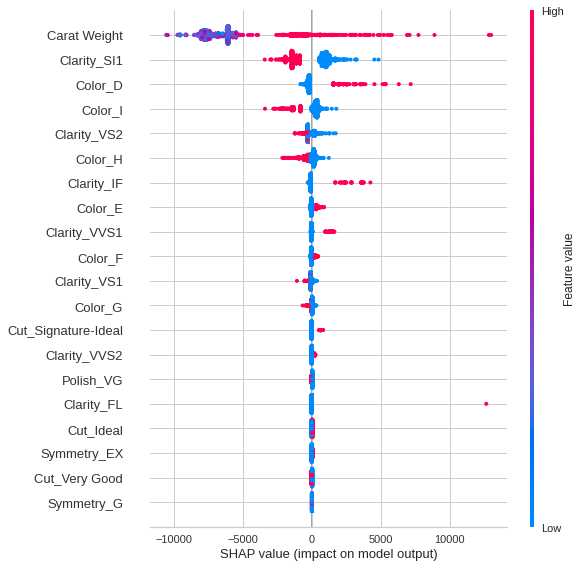

In [ ]:
!pip install shap
interpret_model(cb_tuned)